In [2]:
from sensors.activpal import *
from helpers import pandas_helper
from utils import read_functions
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import pandas as pd

In [3]:
resp = 'BMR012'
#resp = 'BMR032' (start of plot shows some incostistanty)
activpal = Activpal()

In [4]:
activities_df = read_functions.read_activities(resp)
activities_df.head(10)

,start,stop
activiteit,,
fietsen licht,2019-10-14 09:44:00,2019-10-14 09:49:00
fietsen zwaar,2019-10-14 09:49:00,2019-10-14 09:54:00
lopen,2019-10-14 10:03:00,2019-10-14 10:08:30
rennen,2019-10-14 10:08:30,2019-10-14 10:13:50
staan,2019-10-14 10:17:40,2019-10-14 10:22:40
zitten,2019-10-14 10:29:43,2019-10-14 10:34:43
traplopen,2019-10-14 10:38:22,2019-10-14 10:39:31
springen,2019-10-14 10:40:25,2019-10-14 10:41:15


In [5]:
start = activities_df.loc['zitten'].start
#stop = start + pd.DateOffset(seconds=20)
stop = activities_df.loc['zitten'].stop

print('start: ' + str(start))
print('stop: ' + str(stop))

start: 2019-10-14 10:29:43
stop: 2019-10-14 10:34:43


In [6]:
activpal_df = activpal.read_data(resp, start, stop)

In [7]:
def convert_value_to_g(value):
    return (value - 127) / 63

activpal_df['x'] = convert_value_to_g(activpal_df['pal_accX'])
activpal_df['y'] = convert_value_to_g(activpal_df['pal_accY'])
activpal_df['z'] = convert_value_to_g(activpal_df['pal_accZ'])

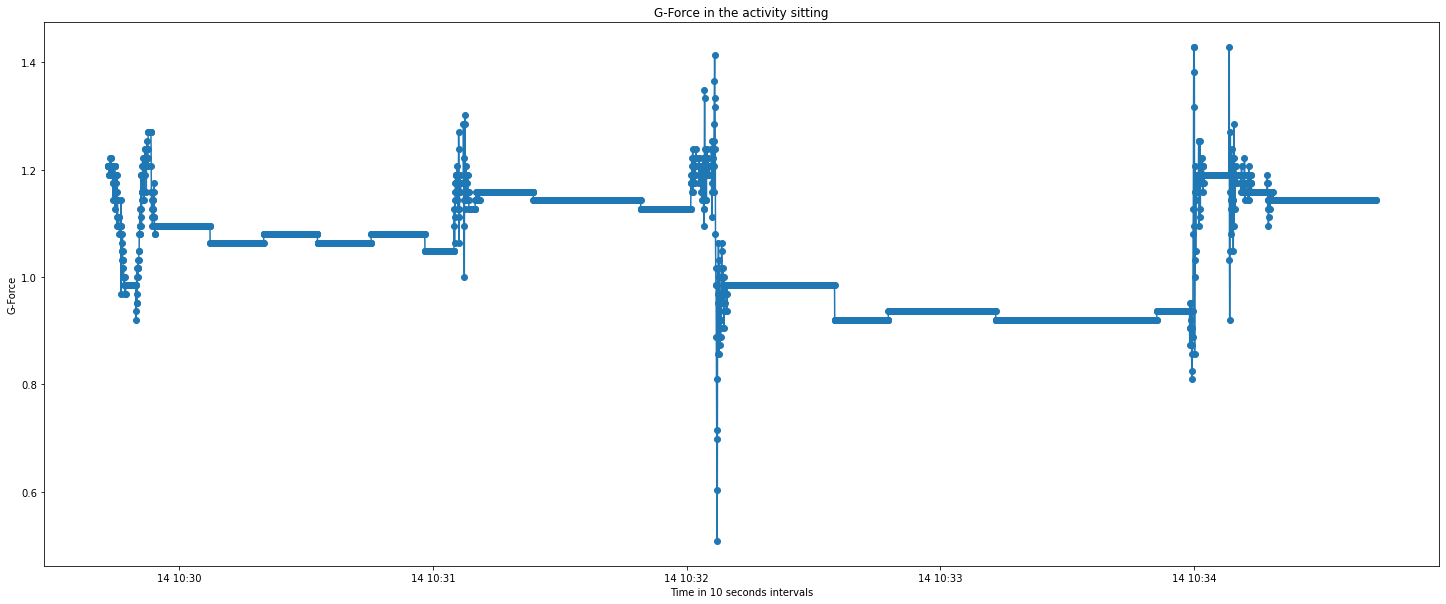

In [8]:
#activpal_df.index = activpal_df.index.max() - activpal_df.index

plt.figure(figsize=(25,10))

plt.title('G-Force in the activity sitting')
plt.xlabel('Time in 10 seconds intervals')
plt.ylabel('G-Force')

#plt.xticks(pd.timedelta_range(start=activpal_df.index.min() , end=activpal_df.index.max() , freq='1s'))

plt.plot(activpal_df.index, activpal_df.z, 'o-')

BMR043-- 1.0952380952380953


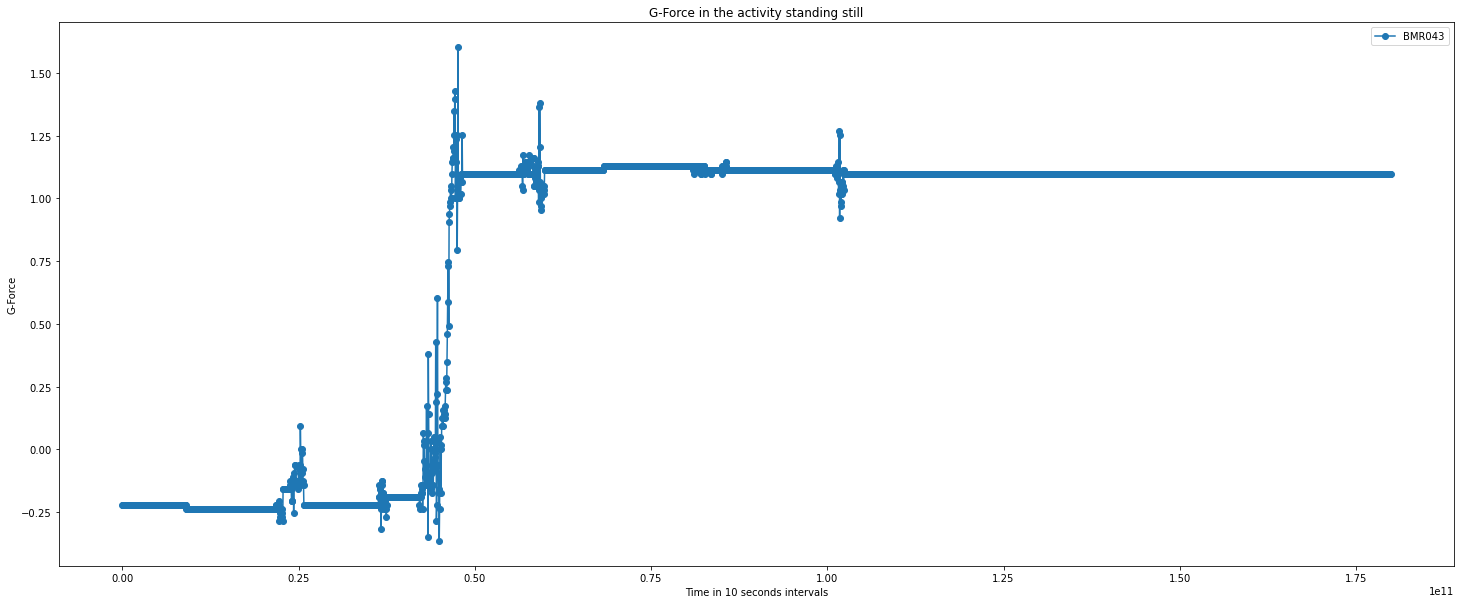

In [13]:
correspondents = ['BMR043']
#correspondents = ['BMR002', 'BMR004', 'BMR008', 'BMR012', 'BMR014', 'BMR015', 'BMR018', 'BMR031', 'BMR032', 'BMR033', 'BMR034','BMR036']
#correspondents = ['BMR040', 'BMR041', 'BMR042', 'BMR043', 'BMR044', 'BMR052', 'BMR053', 'BMR055', 'BMR058', 'BMR064', 'BMR097', 'BMR098', 'BMR099']
#correspondents = ['BMR002', 'BMR004', 'BMR008', 'BMR012', 'BMR014', 'BMR015', 'BMR018', 'BMR031', 'BMR032', 'BMR033', 'BMR034','BMR036', 'BMR040', 'BMR041', 'BMR042', 'BMR043', 'BMR044', 'BMR052', 'BMR053', 'BMR055', 'BMR058', 'BMR064', 'BMR097', 'BMR098', 'BMR099']

plt.figure(figsize=(25,10))
plt.title('G-Force in the activity standing still')
plt.xlabel('Time in 10 seconds intervals')
plt.ylabel('G-Force')

for corr in correspondents:
    activities_df = read_functions.read_activities(corr)
    
    start = activities_df.loc['zitten'].start
    stop = start + pd.DateOffset(seconds=180)
    
    activpal_df = activpal.read_data(corr, start, stop)

    activpal_df['x'] = convert_value_to_g(activpal_df['pal_accX'])
    activpal_df['y'] = convert_value_to_g(activpal_df['pal_accY'])
    activpal_df['z'] = convert_value_to_g(activpal_df['pal_accZ'])
    
    activpal_df.index = activpal_df.index.max() - activpal_df.index
   # print(activpal_df.head())
    activpal_df.dropna(inplace=True)
    
    if len(activpal_df) > 0:
        print(corr + "--",activpal_df.iloc[1].z)
    
    plt.plot(activpal_df.index, activpal_df.z, 'o-', label=corr)
    
plt.legend()

plt.show()